In [1]:
%matplotlib inline
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from datetime import datetime
from StringIO import StringIO
from pymining import seqmining 

sns.set_style('whitegrid')
sns.set_palette('colorblind')
FIG_SIZE = (6, 2.5)
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)


In [11]:
# # compare versions and create dataframe with popularity....
# library_version=pd.read_csv('testing/next_work/library_version.csv', sep=';', dtype=object, index_col=None)
# f=open('../valide_mvn_java/csv/versions_dates_modules.csv')
# tab={}
# comparison={}
# for line1 in f.readlines():
#     line=line1.split(';')
#     library=line[0]
#     date_start=line[3]
#     date_end=line[4]
#     version=str(line[5]).strip('\n')
#     date_compare=str(library_version[(library_version.library==library) & (library_version.version==version )].date.to_string(index=False))
#     try:
#         date_start = datetime.strptime(date_start, "%Y-%m-%d")
#         date_end = datetime.strptime(date_end, "%Y-%m-%d")
#         date_compare = datetime.strptime(date_compare, "%Y-%m-%d")
#         if(date_start<date_end):# the date of start should be before the date of the end
#             if(date_start<date_compare): # if date of use is before the date of release
#                 date_start=date_compare # affect the date release to the start date
#             days=abs((date_end - date_start).days)
#             days_compare=abs((date_start - date_compare).days)
#             try:
#                 comparison[library][version][0]=comparison[library][version][0]+days_compare
#                 comparison[library][version][1]=comparison[library][version][1]+1
#                 tab[library][version][0]=tab[library][version][0]+days
#                 tab[library][version][1]=tab[library][version][1]+1
#             except:
#                 try:
#                     comparison[library][version]=[]
#                     comparison[library][version].append(days_compare)
#                     comparison[library][version].append(1)
#                     tab[library][version]=[]
#                     tab[library][version].append(days)
#                     tab[library][version].append(1)
#                 except:
#                     comparison[library]={}
#                     comparison[library][version]=[]
#                     comparison[library][version].append(days_compare)
#                     comparison[library][version].append(1)     
#                     tab[library]={}
#                     tab[library][version]=[]
#                     tab[library][version].append(days)
#                     tab[library][version].append(1)     
#     except:
#         pass
# csv="library;version;period_use;periode_release;projects\n"
# for library in tab:
#     for version in sorted(tab[library]):
#         maj_version=str(major_version[(major_version.library==library) & (major_version.version==version )].number.to_string(index=False))
#         moyen=int(int(tab[library][version][0])/int(tab[library][version][1]))/30
#         moyen2=int(int(comparison[library][version][0])/int(comparison[library][version][1]))/30
#         csv=csv+library+';'+version+';'+str(moyen)+';'+str(moyen2)+';'+str(maj_version)+'\n'
# period_df = pd.read_csv(StringIO(csv), sep=";", dtype=object, index_col=None)
# #period_df.to_csv('testing/next_work/versions_stat.csv', sep=';', index=False)

In [ ]:
# period_df=pd.read_csv('testing/next_work/versions_stat.csv', sep=';', dtype=object, index_col=None)
# period_df['period_use']=period_df['period_use'].apply(int)
# period_df['periode_release']=period_df['periode_release'].apply(int)
# period_df['projects']=period_df['projects'].apply(int)
# tmp_df=period_df[period_df.library=='junit']
# ax=tmp_df.plot(kind='bar', x="version", y="projects" , title="Junit Versions Usage", color='g')
# ax.set_ylabel('projects')
# ax=tmp_df.plot(kind="bar", x="version", y=['period_use','periode_release'], colors=['r','b'])#, title='periode of using a version')
# ax.set_ylabel('months')
# # ax=tmp_df.plot(kind="bar", x="version", y="periode_release", title='periode between release and use of a version ')
# # ax.set_ylabel('months')+++

In [5]:
library_version=pd.read_csv('testing/next_work/library_version.csv', sep=';', dtype=object, index_col=None)
library_version['version']=library_version['version'].apply(str)
#f=open('../valide_mvn_java/csv/versions_dates_modules.csv')
tab=[]
s=open('testing/next_work/versions_dates.csv', 'w')
s.write('library;project;module;date_start;date_end;version;period_use;period_release\n')
for line1 in f.readlines():
    line1=line1.strip('\n')
    line=line1.split(';')
    date_compare=str(library_version[(library_version.library==line[0]) & (library_version.version==line[5] )].date.to_string(index=False))
    if(date_compare!='Series([], )'):
        date_compare = datetime.strptime(date_compare, "%Y-%m-%d")
        date_start = datetime.strptime(line[3], "%Y-%m-%d")
        date_end = datetime.strptime(line[4], "%Y-%m-%d")
        if(date_start<date_compare):
            date_start=date_compare
        days_compare=abs((date_start - date_compare).days)
        days=abs((date_end - date_start).days)
        s.write(line1+';'+str(days/30)+';'+str(days_compare/30)+'\n')
s.close()

IOError: [Errno 2] No such file or directory: '../valide_mvn_java/csv/versions_dates_modules.csv'

In [4]:
versions_dates=pd.read_csv('testing/next_work/versions_dates.csv', sep=';', dtype=object, index_col=None)
versions_dates['period_use']=versions_dates['period_use'].apply(int)
versions_dates['period_release']=versions_dates['period_release'].apply(int)
how_many_projects=versions_dates.groupby('library').count().project
how_many_projects

library
junit                  20560
org.assertj              620
org.easymock            1464
org.hamcrest            1567
org.mockito             3795
org.powermock            622
org.springframework     5309
org.testng              1650
Name: project, dtype: int64

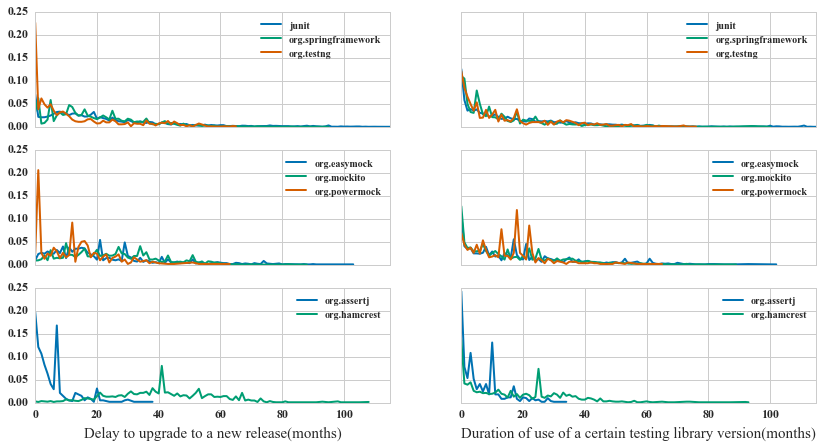

In [8]:
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize']= 15
plt.rcParams['lines.linewidth']= 2
plt.rcParams['lines.markersize']= 1

versions_dates=pd.read_csv('testing/next_work/versions_dates.csv', sep=';', dtype=object, index_col=None)
versions_dates['period_use']=versions_dates['period_use'].apply(int)
versions_dates['period_release']=versions_dates['period_release'].apply(int)

how_many_projects=versions_dates.groupby('library').count().project
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True)
plt.figure(figsize=(20, 14))
for library in how_many_projects.keys():
    a=versions_dates[versions_dates.library==library].groupby('period_release').count()
    b=versions_dates[versions_dates.library==library].groupby('period_use').count()
    a['pro_project']=a['project']/float(how_many_projects[library])
    b['pro_project']=b['project']/float(how_many_projects[library])
    if(library=='junit' or library=='org.testng' or library=='org.springframework'):
        ax=a.plot(y='pro_project', label=library, ax=axes[0][0])
        ax1=b.plot(y='pro_project', label=library, ax=axes[0][1])
    elif(library=='org.mockito' or library=='org.powermock' or library=='org.easymock' ):
        ax=a.plot(y='pro_project', label=library, ax=axes[1][0], figsize=(14,7))
        ax1=b.plot(y='pro_project', label=library, ax=axes[1][1])
    else:
        ax=a.plot(y='pro_project', label=library, ax=axes[2][0]).set_xlabel('Delay to upgrade to a new release(months)')
        ax1=b.plot(y='pro_project', label=library, ax=axes[2][1]).set_xlabel('Duration of use of a certain testing library version(months)')
fig.savefig('period_release_use.pdf', bbox_inches='tight', facecolor='white')


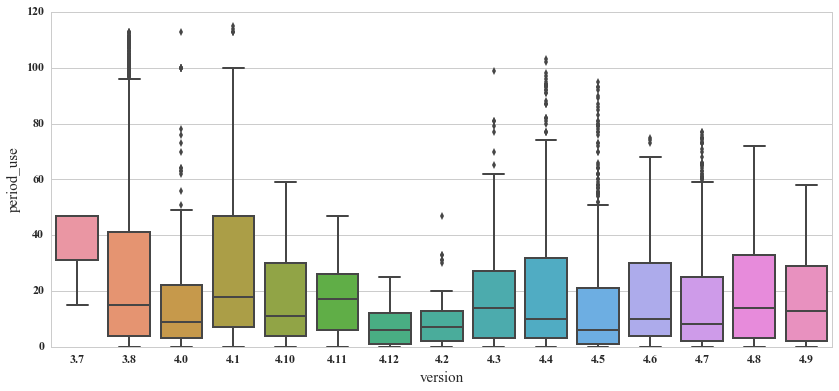

In [7]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='version', y='period_use', data=versions_dates[versions_dates.library=="junit"]).set_axis_bgcolor('white')


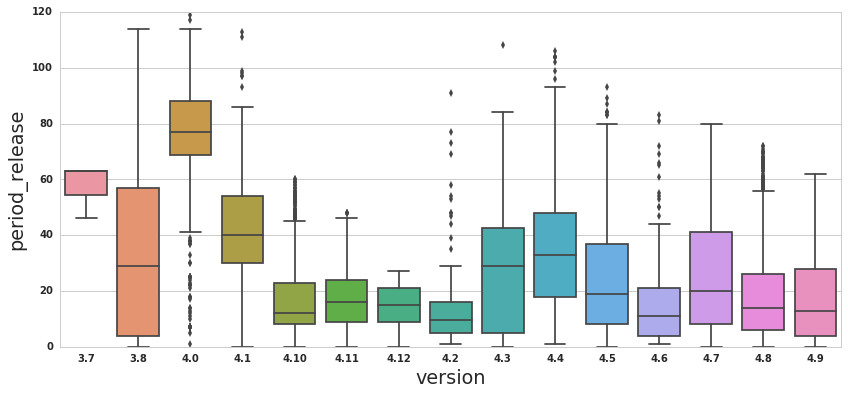

In [144]:
plt.figure(figsize=(14, 6))
ax = sns.boxplot( x='version', y='period_release', data=versions_dates[versions_dates.library=="junit"]).set_axis_bgcolor('white')


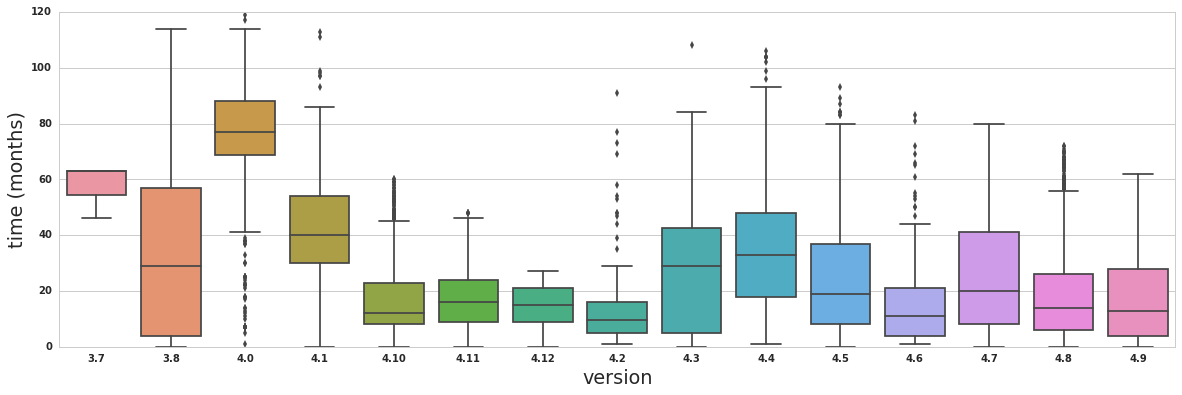

In [187]:
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x='version', y='period_release',data=versions_dates[versions_dates.library=="junit"]).set_axis_bgcolor('white')
plt.ylabel('time (months)')
plt.savefig('adopt_latency.pdf', bbox_inches='tight', facecolor='white')

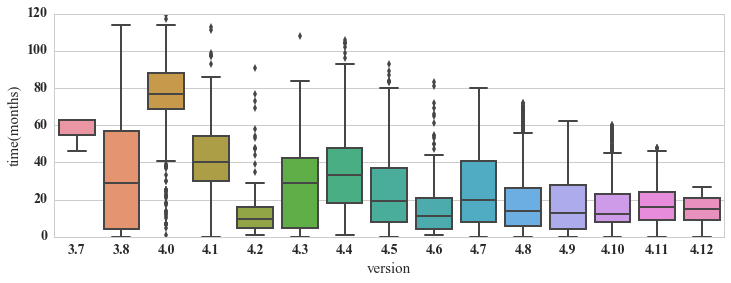

In [10]:
#versions_dates[versions_dates.library=='junit'].plot(x='project', y='period_use')
junit_cols=['3.7', '3.8','4.0', '4.1', '4.2', '4.3','4.4', '4.5','4.6', '4.7', '4.8', '4.9', '4.10','4.11', '4.12']
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.figure(figsize=(12,4))
vdj=versions_dates[versions_dates.library=='junit'].sort_values(["version"], ascending=False)
vdj=vdj.sort_values(["date_start"], ascending=False)
#vdj.plot( x='date_start', y='period_release')
vdj['new_pr']=vdj['period_release'].apply(lambda x: (int(x) - 22.61))
#vdj['new_pr'].groupby(vdj['version']).mean().plot(kind='bar')
ax = sns.boxplot(x='version', y='period_release', data=vdj, order=junit_cols).set_axis_bgcolor('white')
plt.xlabel('version')
plt.ylabel('time(months)')
plt.savefig('adopt_latency.pdf', bbox_inches='tight', facecolor='white')

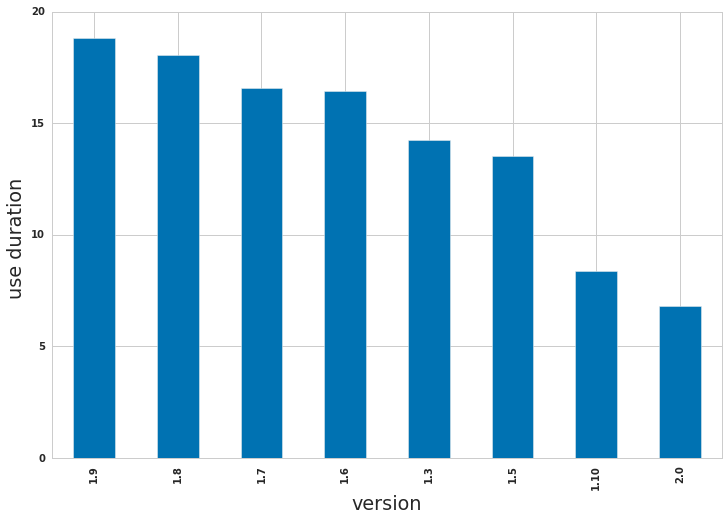

In [137]:
#versions_dates[versions_dates.library=='junit'].plot(x='project', y='period_use')
plt.figure(figsize=(12, 8))
vdj=versions_dates[versions_dates.library=='org.mockito'].sort_values(["version"], ascending=False)
vdj=vdj.sort_values(["date_start"], ascending=False)
#vdj.plot( x='date_start', y='period_release')
#vdj['new_pr']=vdj['periode_use'].apply(lambda x: (int(x) - 22.61))
vdj['period_use'].groupby(vdj['version']).mean().sort_values(ascending=False).plot(kind='bar')
#ax = sns.boxplot(x='version', y='period_release', data=vdj).set_axis_bgcolor('white')
plt.xlabel('version')
plt.ylabel('use duration ')
plt.savefig('period_use.png', bbox_inches='tight', facecolor='white')

In [166]:
issues_libraries=pd.read_csv('../experiments/github_issues/issues_librarie.csv', 
                             usecols=['project', 'assertj', 'junit', 'testng','hamcrest','spring','mockito','easymock','powermock'],  
                             sep=';', dtype=object, index_col=None)
tab={}
for i in range(1,9):
    lib1=str(list(issues_libraries)[i])
    tab[lib1]={}
    for j in range(i+1,9):
        lib2=str(list(issues_libraries)[j])
        count=len(issues_libraries[(issues_libraries[lib1]=='1') & (issues_libraries[lib2]=='1') ])
        tab[lib1][lib2]=count
csv='lib1;lib2;value\n'
for lib1 in tab:
    for lib2 in tab[lib1]:
        csv=csv+lib1+";"+lib2+";"+str(tab[lib1][lib2])+'\n'
issues_testing = pd.read_csv(StringIO(csv), sep=";", dtype=object, index_col=None)

In [92]:
number_packages_testing=pd.read_csv('../4_libraries/csv/number_packages_testing.csv', sep=';', dtype=object, index_col=None)
number_packages_testing['projects']=number_packages_testing['projects'].apply(int)
number_packages_testing['files']=number_packages_testing['files'].apply(int)
number_packages_testing = number_packages_testing.sort_values(["projects"], ascending=False)
number_classes_testing=pd.read_csv('../4_libraries/csv/number_classes_testing.csv', sep=';', dtype=object, index_col=None)
number_classes_testing['projects']=number_classes_testing['projects'].apply(int)
number_classes_testing = number_classes_testing.sort_values(["projects"], ascending=False)

C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Ahmed\Anaconda2\lib\site-packages\matplotlib\font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


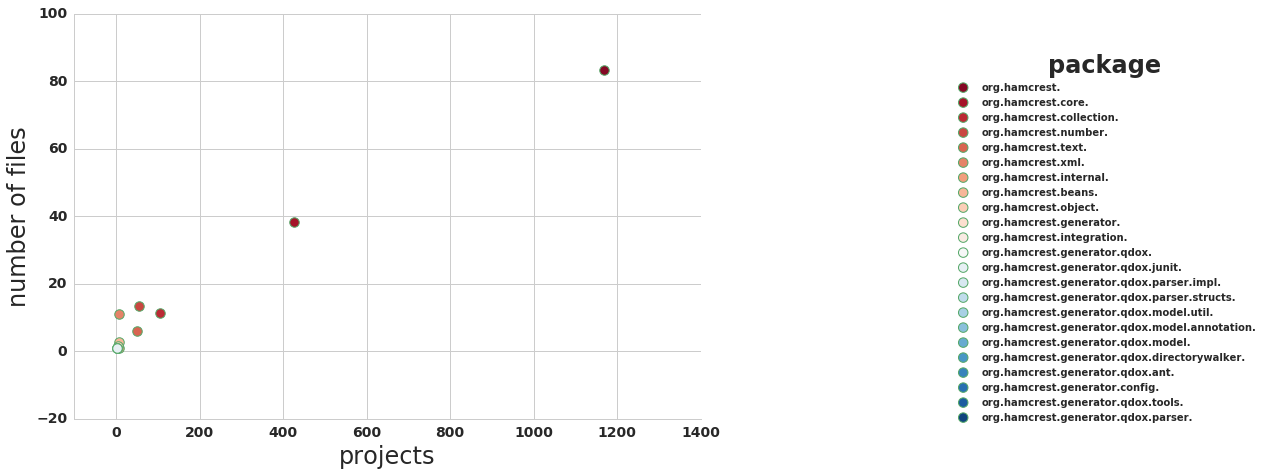

In [4]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)
number_packages_libary=number_packages_testing[number_packages_testing.library=='hamcrest']
number_classes_libary=number_classes_testing[number_classes_testing.library=='hamcrest']
number_packages_libary['mean_files']=number_packages_libary['files']/number_packages_libary['projects']
sns.color_palette("RdBu", n_colors=30)
kws = dict(s=90, linewidth=1, edgecolor="g")
g = sns.FacetGrid(number_packages_libary, hue="package", palette="RdBu", size=7)
g = (g.map(plt.scatter, "projects", "mean_files", **kws).add_legend())
axes = g.axes
g.fig.set_figwidth(20)

#plt.yscale('log')
#plt.xscale('log')
plt.xlim(-100,)
#plt.ylim(1,1200000)
plt.ylabel('number of files')

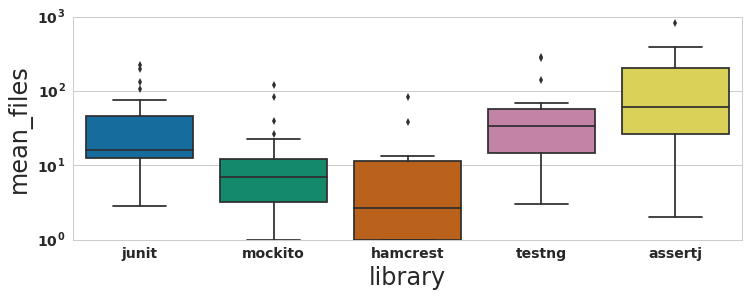

In [67]:
npt_junit.sort_values('files', ascending=True)
number_packages_testing['mean_files']=number_packages_testing['files']/number_packages_testing['projects']
ax1 = sns.boxplot(y="mean_files", x="library",data=number_packages_testing, )
ax1.set_yscale('log')
ax1.figure.set_size_inches(12,4)
ax1.figure.savefig('package_usage.pdf', bbox_inches='tight', facecolor='white')

In [104]:
for lib in number_packages_testing.library.unique():
    print(len(number_packages_testing.query('library=="'+lib+'"')), lib)

(30, 'junit')
(67, 'mockito')
(23, 'hamcrest')
(22, 'testng')
(30, 'assertj')


In [96]:
#number_packages_testing['projects_pro']=number_packages_testing['projects']/number_packages_testing['max_pro']
#df=number_packages_testing
number_packages_testing['pro_projects']=number_packages_testing['projects']/number_packages_testing['max_projects']

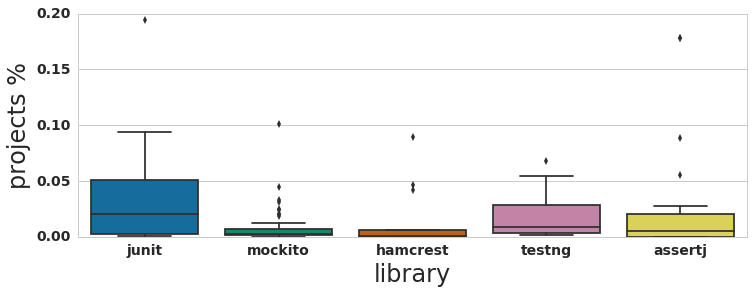

In [103]:
ax1 = sns.boxplot(y="pro_projects", x="library",data=number_packages_testing, )
#ax1.set_yscale('log')
ax1.set_ylim(0,0.2)
ax1.set_ylabel('projects %')
ax1.figure.set_size_inches(12,4)
ax1.figure.savefig('package_usage_projects.pdf', bbox_inches='tight', facecolor='white')


In [70]:
number_packages_testing.head()

,library,package,files,projects,mean_files
57,junit,org.junit.,1106708,5570,198.690844
1,junit,junit.framework.,386531,3603,107.280322
2,junit,junit.runner.,186070,2491,74.696909
76,junit,org.junit.runner.,185730,2482,74.830782
83,mockito,org.mockito.,143936,1736,82.912442


C:\Users\Ahmed\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


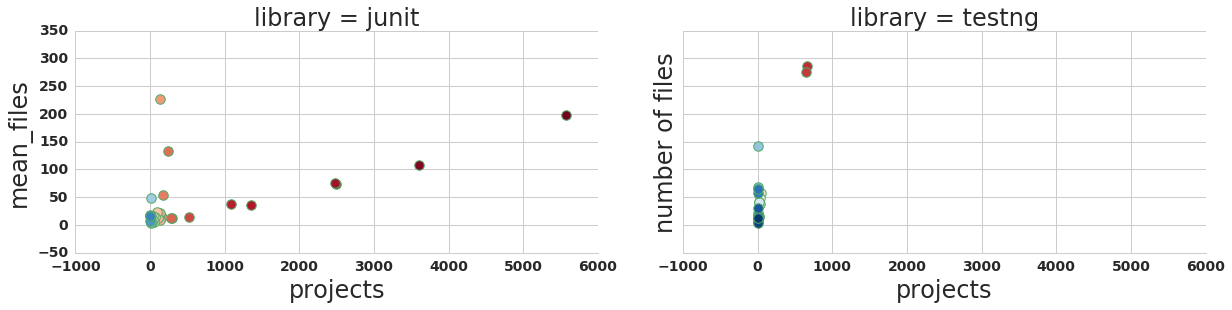

In [45]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}
plt.rc('font', **font)

#fig, axez = plt.subplots(1, 2, sharex=True, sharey=True)

npt_junit=number_packages_testing.query("library=='junit' or library=='testng'")
number_classes_libary=number_classes_testing.query("library=='junit' or library=='testng'")
npt_junit['mean_files']=npt_junit['files']/npt_junit['projects']
sns.color_palette("RdBu", n_colors=30)
kws = dict(s=90, linewidth=1, edgecolor="g")

g = sns.FacetGrid(npt_junit, hue="package", col="library", palette="RdBu", size=7)
g = (g.map(plt.scatter, "projects", "mean_files", **kws))
g.fig.set_size_inches(18,4)
#plt.xlim(-100,)
plt.ylabel('number of files')
g.savefig('package_usage.pdf', bbox_inches='tight', facecolor='white')


In [7]:
number_classes_junit=number_packages_testing[number_packages_testing['library']=='junit']
number_classes_junit=number_classes_junit.drop('library',1)

In [46]:
modules_number=pd.read_csv('testing/next_work/modules_number.csv', sep=';', dtype=object, index_col=None)
modules_number['modules']=modules_number['modules'].apply(int)
modules_number=modules_number.sort_values(["modules"], ascending=False)


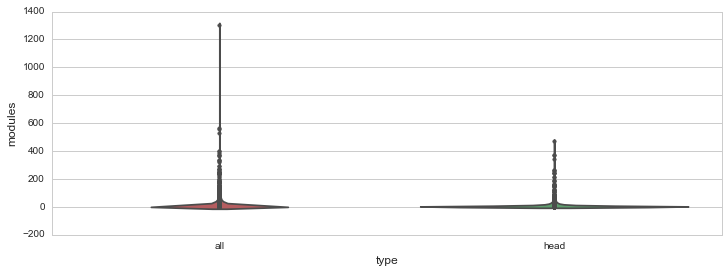

In [49]:
plt.figure(figsize=(12, 4))
ax = sns.violinplot(x='type', y='modules', data=modules_number, palette=['r','g'],
                    inner='points', color="0.7")


In [210]:
all_versions_ignore=pd.read_csv('testing/next_work/all_versions_ignore.csv', sep=';', dtype=object, index_col=None)
all_versions_ignore['number']=all_versions_ignore['number'].apply(int)
all_versions_ignore=all_versions_ignore.sort_values(["number"], ascending=False)

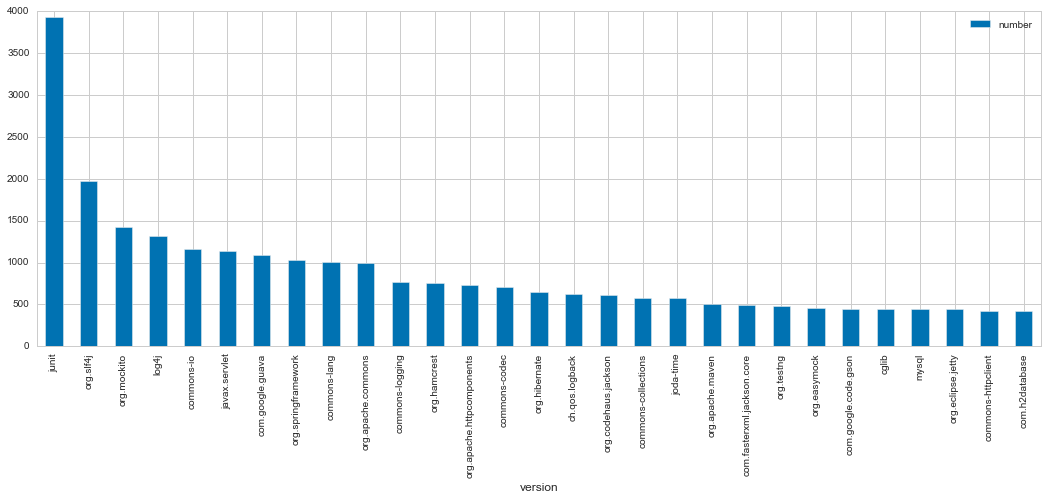

In [211]:
all_versions_ignore[all_versions_ignore['number']>=400].plot(kind='bar', x='version', y='number', figsize=(18, 6))

In [99]:
numpyMatrix = all_versions_ignore[all_versions_ignore['number']>=400].version.as_matrix()
len(numpyMatrix)

29

In [41]:
evolution_packages=pd.read_csv('../4_libraries/csv/evolution_packages.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")

(389L, 557L)

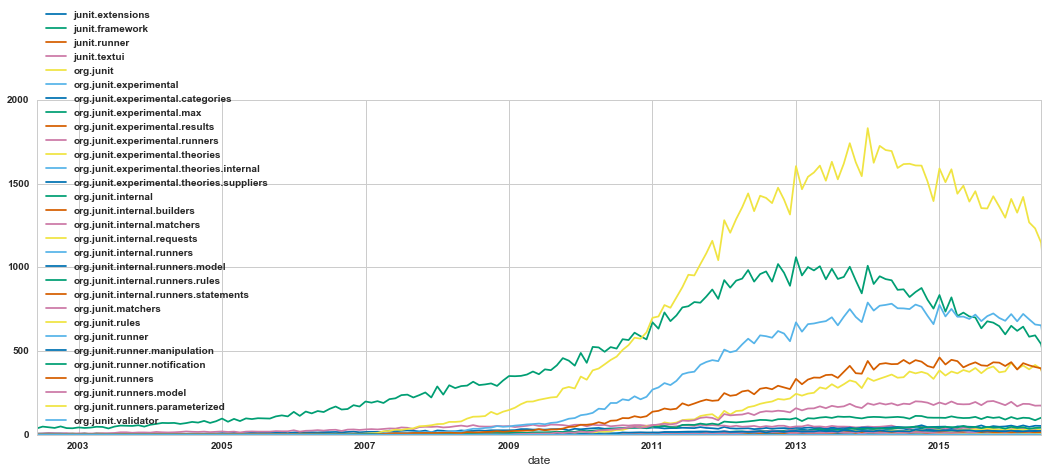

In [42]:
df_lib=pd.DataFrame()
df_lib['date']=evolution_packages['date']
for x in evolution_packages:
    lib=str(x).split('.')
    if len(lib)>1:
        if 'junit' in lib[0] or 'junit' in lib[1]:
            df_lib[str(x)]=evolution_packages[str(x)].apply(int)
#evolution_packages['org.junit']=evolution_packages['org.junit'].apply(int)
ax=df_lib.plot(['date'], figsize=(18, 6))

ax.set_xlim('2002-06','2016-06')

In [45]:
packages = [line.rstrip('\n') for line in open('../4_libraries/packages_libraries')]


'org.junit.runner'

In [37]:
%run ../4_libraries/py_programs/apriori.py -f ../4_libraries/csv/freq_packages_perFile_moreThan2.csv -s 0.1 -c 0.5

item: ('77', '80', '58') , 0.106
item: ('76',) , 0.113
item: ('80', '58') , 0.127
item: ('77', '80') , 0.133
item: ('80',) , 0.157
item: ('77', '58') , 0.354
item: ('77',) , 0.397
item: ('2', '58') , 0.487
item: ('2',) , 0.500
item: ('58',) , 0.939

------------------------ RULES:
Rule: ('58',) ==> ('2',) , 0.519
Rule: ('80',) ==> ('77', '58') , 0.678
Rule: ('77', '80') ==> ('58',) , 0.798
Rule: ('80',) ==> ('58',) , 0.810
Rule: ('80', '58') ==> ('77',) , 0.838
Rule: ('80',) ==> ('77',) , 0.850
Rule: ('77',) ==> ('58',) , 0.892
Rule: ('2',) ==> ('58',) , 0.973


# TEST COVERAGE

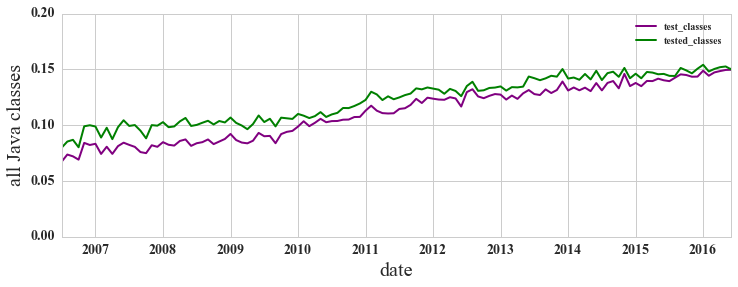

In [279]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize']= 20

test_coverage=pd.read_csv('../4_libraries/csv/evolution_test_coverage.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for x,stri in enumerate(test_coverage):
    if x>0 :
        test_coverage[stri]= test_coverage[stri].apply(int)
test_coverage['test_files']=test_coverage['test_files']/test_coverage['all_files']
test_coverage['tested_files']=test_coverage['tested_files']/test_coverage['all_files']
test_coverage=test_coverage.drop('total',1)
test_coverage=test_coverage.drop('all_files',1)
test_coverage['test_classes']=test_coverage['test_files']
test_coverage['tested_classes']=test_coverage['tested_files']
test_coverage=test_coverage.drop('test_files',1)
test_coverage=test_coverage.drop('tested_files',1)

test_coverage.plot(['date'], figsize=(12, 4), color=['purple','green'])
plt.xlim('2006-07','2016-06')
plt.ylim(0,0.2)
plt.ylabel('all Java classes')
plt.savefig('co-evoluttion_test.pdf', bbox_inches='tight', facecolor='white')

In [ ]:
#Just the project checkstyle
checkstyle_checkstyle=pd.read_csv('../4_libraries/csv/checkstyle_checkstyle.git.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
checkstyle_checkstyle=checkstyle_checkstyle.drop('commit',1)
for x,stri in enumerate(checkstyle_checkstyle):
    if x>0:
        checkstyle_checkstyle[stri]= checkstyle_checkstyle[stri].apply(int)
checkstyle_checkstyle.plot(['date'])
plt.xlim('2002-06','2016-07')

In [ ]:
# db_evolution up to 2017
db_test_coverage=pd.read_csv('../4_libraries/csv/evolution_db_test_coverage.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for x,stri in enumerate(db_test_coverage):
    if x>0:
        db_test_coverage[stri]= db_test_coverage[stri].apply(int)
db_test_coverage['tested_files']=db_test_coverage['tested_files']/db_test_coverage['db_files']
db_test_coverage.plot(x="date", y="tested_files", figsize=(18, 6), color='green')
plt.xlim('2006-07','2016-07')
plt.ylabel('database files')

In [181]:
evolution_dbtest=pd.read_csv('../4_libraries/csv/evolution_dbtest_coverage.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(evolution_dbtest):
    if i>0:
        evolution_dbtest[p]= evolution_dbtest[p].apply(int)
evolution_dbtest['db_tested']=evolution_dbtest['db_tested']/evolution_dbtest['db_files']

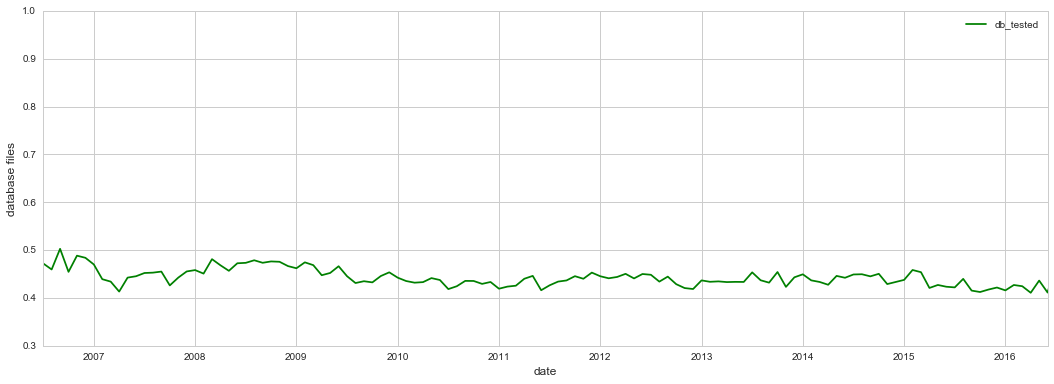

In [189]:
evolution_dbtest.plot(x="date", y="db_tested", figsize=(18, 6), color='green')
plt.xlim('2006-07','2016-06')
plt.ylabel('database files')

(438L, 557L)

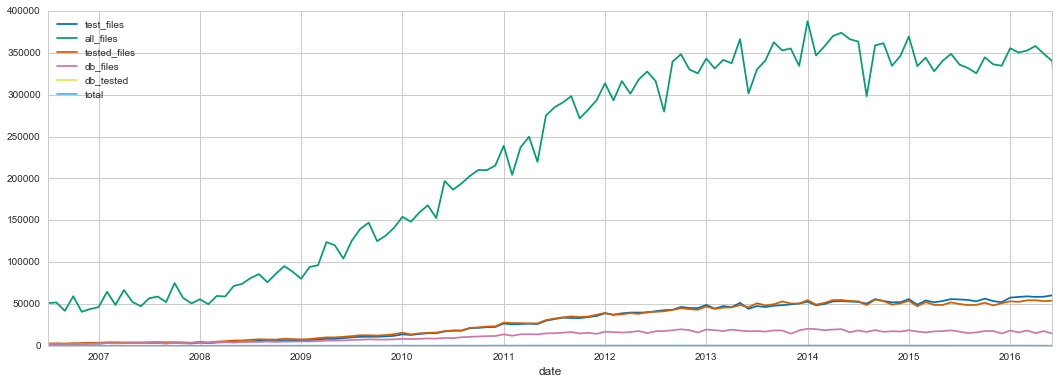

In [188]:
evolution_dbtest.plot(['date'],figsize=(18, 6))
plt.xlim('2006-07','2016-06')

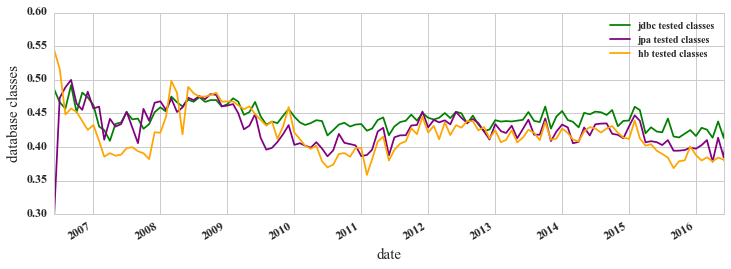

In [44]:
evo_dbTest_3libs=pd.read_csv('testing/next_work/evo_dbTest_3libs_details.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(evo_dbTest_3libs):
    if i>0 and i<7:
        evo_dbTest_3libs[p]= evo_dbTest_3libs[p].apply(int)
evo_dbTest_3libs['db_tested']=evo_dbTest_3libs['db_tested']/evo_dbTest_3libs['db_files']
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize']= 15

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jdbc'].plot(x="date", y="db_tested", figsize=(12, 4), color='green', label='jdbc tested classes')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jpa'].plot(ax=ax, x="date", y="db_tested", figsize=(12, 4), color='purple',label='jpa tested classes')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='hb'].plot(ax=ax, x="date", y="db_tested", figsize=(12, 4), color='orange', label='hb tested classes')
plt.xlim('2006-06','2016-06')
plt.ylabel('database classes')
plt.ylim(0.3,0.6)
plt.savefig('co-evoluttion_db.pdf', bbox_inches='tight', facecolor='white')

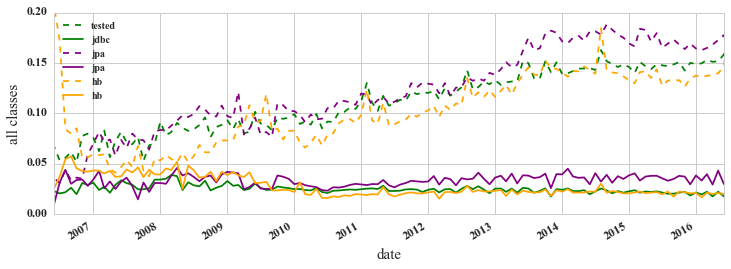

In [42]:
evo_dbTest_3libs=pd.read_csv('./testing/next_work/evo_dbTest_3libs_details.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(evo_dbTest_3libs):
    if i>0 and i<7:
        evo_dbTest_3libs[p]= evo_dbTest_3libs[p].apply(int)
evo_dbTest_3libs['tested_classes']=evo_dbTest_3libs['tested_files']/evo_dbTest_3libs['all_files']
evo_dbTest_3libs['tested_db2']=evo_dbTest_3libs['db_tested']/evo_dbTest_3libs['all_files']

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize']= 15

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jdbc'].plot(x="date", y="tested_classes", linestyle='--', figsize=(12, 4), color='green', label='tested')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jdbc'].plot(ax=ax, x="date",  y="tested_db2", figsize=(12, 4), color='green', label='jdbc')

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jpa'].plot(ax=ax, x="date",linestyle='--', y="tested_classes", figsize=(12, 4), color='purple',label='jpa')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jpa'].plot(ax=ax, x="date", y="tested_db2", figsize=(12, 4), color='purple',label='jpa')

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='hb'].plot(ax=ax, x="date",linestyle='--', y="tested_classes", figsize=(12, 4), color='orange', label='hb')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='hb'].plot(ax=ax, x="date", y="tested_db2", figsize=(12, 4), color='orange', label='hb')

plt.xlim('2006-06','2016-06')
plt.ylabel('all classes')
plt.ylim(0,0.2)
plt.savefig('co_evolution_db_test.pdf', bbox_inches='tight', facecolor='white')


(0, 2)

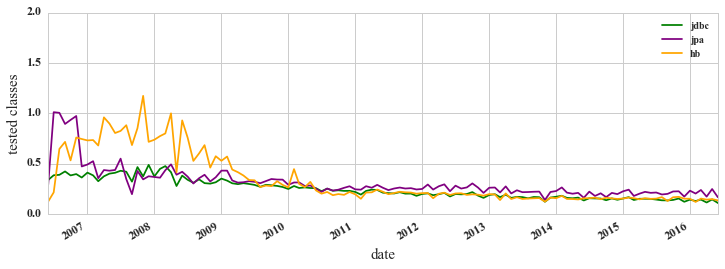

In [45]:
evo_dbTest_3libs=pd.read_csv('./testing/next_work/evo_dbTest_3libs_details.csv',
                                sep=';', dtype=object, index_col=None,
                              parse_dates=['date'], infer_datetime_format="%Y-%m-%d")
for i,p in enumerate(evo_dbTest_3libs):
    if i>0 and i<7:
        evo_dbTest_3libs[p]= evo_dbTest_3libs[p].apply(int)
evo_dbTest_3libs['db_tested']=evo_dbTest_3libs['db_tested']/evo_dbTest_3libs['tested_files']
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize']= 15

ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jdbc'].plot(x="date", y="db_tested", figsize=(12, 4), color='green', label='jdbc')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='jpa'].plot(ax=ax, x="date", y="db_tested", figsize=(12, 4), color='purple',label='jpa')
ax=evo_dbTest_3libs[evo_dbTest_3libs.lib=='hb'].plot(ax=ax, x="date", y="db_tested", figsize=(12, 4), color='orange', label='hb')
plt.xlim('2006-06','2016-06')
plt.ylabel('tested classes')
plt.ylim(0,2)